In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np



In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
len(mnist.data)

70000

In [5]:
import matplotlib.pyplot as plt

def show_image(data, label):
    img = data.reshape(28, 28)
    plt.imshow(img, cmap="binary")
    plt.title(f'{label}')
    plt.show()

In [6]:
X = mnist.data
y = mnist.target

In [7]:
sample = X[0]

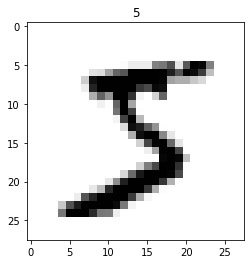

In [8]:
show_image(sample, y[0])

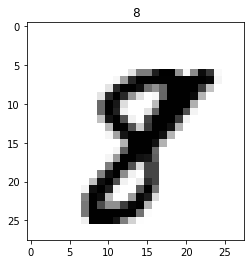

In [9]:
show_image(X[55], y[55])

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [11]:
y = y.astype('int8')

In [12]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]   #????

In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Training a Binary Classifier

In [42]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [43]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

In [44]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [50]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=47)

In [51]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=47, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

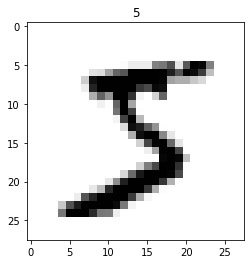

In [53]:
show_image(sample, y[0])

In [54]:
sgd_clf.predict([X[55]])

array([False])

## Performance Measures

In [56]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9644 , 0.96595, 0.952  ])

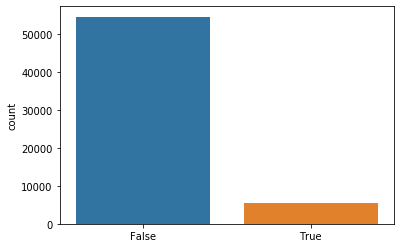

In [58]:
import seaborn as sns

sns.countplot(y_train_5)

In [60]:
print("True value %", (sum(y_train_5 == True)/len(y_train_5))*100)
print("False value %", round((sum(y_train_5 == False)/len(y_train_5))*100, 2))

True value % 9.035
False value % 90.96


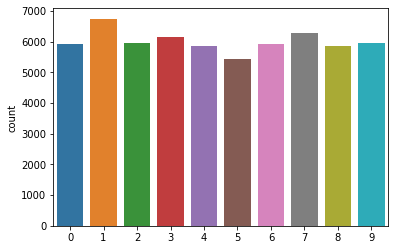

In [61]:
sns.countplot(y_train)

## Confusion Matrix

In [62]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) #??

In [77]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53852,   727],
       [ 1626,  3795]], dtype=int64)

In [79]:
mat = confusion_matrix(y_train_5,y_train_pred)

In [80]:
conf_df = pd.DataFrame(mat, index=['negative', 'positive'], columns=['negative', 'positive'])
conf_df

,negative,positive
negative,53852,727
positive,1626,3795


In [81]:
from sklearn.metrics import precision_score, recall_score


precision_score(y_train_5, y_train_pred)     

0.8392304290137107

In [86]:
#PRECISION = TP/TP+FP
#recall = TP/TP+FN

In [87]:
recall_score(y_train_5, y_train_pred)

0.7000553403431101

## Precision Recall Trade-off

In [91]:
y_scores = sgd_clf.decision_function([sample])

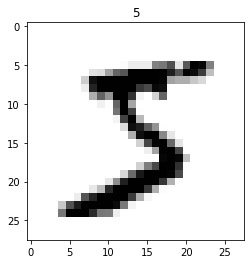

In [93]:
show_image(sample, y[0])

In [95]:
y_scores

array([1909.08072371])

In [96]:
thresh = 0

y_scores > thresh

array([ True])

In [97]:
thresh = 8000

y_scores > thresh

array([False])

## Deciding Threshold

In [98]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [99]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [16]:
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlim([-70000, 70000])
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.legend(loc="best")     #position of box(legend66666)
plt.show()

NameError: name 'thresholds' is not defined

In [101]:
thresholds[np.argmax(precisions > 0.90)]

1952.5038779999993

In [102]:
thresholds[np.argmax(precisions > 0.9)]

1952.5038779999993

In [103]:
threshold_90 = thresholds[np.argmax(precisions)>0.90]
threshold_90[:, 1].ndim                                             #converting 2D to 1D

1

In [112]:
y_train_pred_90 = (y_scores >= threshold_90[:, 1])

In [113]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

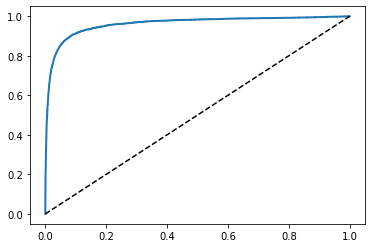

In [114]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')

In [115]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616